In [ ]:
%matplotlib inline
import pandas as pd
path='/content/drive/MyDrive/data/important1.csv'
data = pd.read_csv(path )
data.head()


,HE,MWh
0,01-01-2022 00:00,10840
1,01-01-2022 01:00,10590
2,01-01-2022 02:00,10201
3,01-01-2022 03:00,10021
4,01-01-2022 04:00,10278


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HE      8760 non-null   object
 1   MWh     8760 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 137.0+ KB


In [ ]:
data.head()

,HE,MWh
0,01-01-2022 00:00,10840
1,01-01-2022 01:00,10590
2,01-01-2022 02:00,10201
3,01-01-2022 03:00,10021
4,01-01-2022 04:00,10278


In [ ]:
data.index


RangeIndex(start=0, stop=8760, step=1)

In [ ]:
data=data.set_index('HE')
data.head()
#data['energy'] = data['energy'].astype(float)
#data['energy'] = float(data['energy'])

,MWh
HE,
01-01-2022 00:00,10840
01-01-2022 01:00,10590
01-01-2022 02:00,10201
01-01-2022 03:00,10021
01-01-2022 04:00,10278


In [ ]:
#check for stationarity of data using adf method
from statsmodels.tsa.stattools import adfuller
result=adfuller (data)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -5.455458
p-value: 0.000003
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
#data['energy']=data['energy']-data['energy'].shift(1)
#data['energy']=data['energy'].rolling(window=20).mean()
#data.plot()
#data.head(20)
#import numpy as np
#df_log=np.(data['energy'])
#df_diff=df_log.diff().dropna()
#df_diff.head()


In [ ]:
#from statsmodels.tsa.stattools import adfuller
#result=adfuller (df_diff)
#print('Test Statistic: %f' %result[0])
#print('p-value: %f' %result[1])
#print('Critical values:')
#for key, value in result[4].items ():
     #print('\t%s: %.3f' %(key, value))
#import matplotlib.pyplot as plt
#plt.plot(df_diff,label="after")

In [ ]:
pip install cufflinks


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


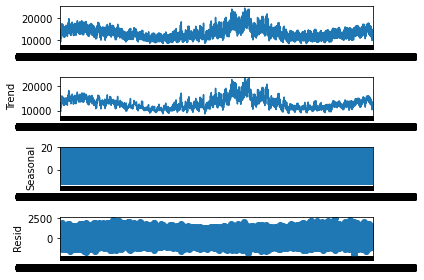

In [ ]:

from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data,period=10)
fig = result.plot()

In [ ]:

import chart_studio as ply
import cufflinks as cf

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
data['MWh']=np.log(data['MWh'])
data.head()

,MWh
HE,
01-01-2022 00:00,2.229046
01-01-2022 01:00,2.226532
01-01-2022 02:00,2.222485
01-01-2022 03:00,2.220555
01-01-2022 04:00,2.223300


In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=26.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-62112.130, Time=6.53 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=39.97 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=18.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=9.24 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=9.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-76768.710, Time=17.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-76735.903, Time=43.46 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-78499.809, Time=20.49 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-72679.886, Time=15.11 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=-78494.567, Time=26.00 sec


In [ ]:
print(stepwise_model.conf_int())

                      0              1
ar.L1          0.119899       0.251642
ar.S.L12      -0.784594      -0.719606
ma.S.L12      -0.548415      -0.420990
sigma2    121501.204927  142257.272325


In [ ]:
stepwise_model.aic()

10404.862572955195

In [ ]:
data.head()
data.tail(5)

,MWh
DATETIME,
01/30/2023 20,15179
01/30/2023 21,14381
01/30/2023 22,13483
01/30/2023 23,12450
01/30/2023 00,11540


In [ ]:
data.info()
train = data.loc[:'01/10/2023 00']
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 01/01/2023 01 to 01/30/2023 00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MWh     720 non-null    int64
dtypes: int64(1)
memory usage: 27.4+ KB


,MWh
DATETIME,
01/01/2023 01,9825
01/01/2023 02,9322
01/01/2023 03,9366
01/01/2023 04,9316
01/01/2023 05,9668


In [ ]:
test = data.loc['01/11/2023 01':]

In [ ]:
test


,MWh
DATETIME,
01/11/2023 01,13031
01/11/2023 02,13039
01/11/2023 03,12821
01/11/2023 04,13206
01/11/2023 05,13073
...,...
01/30/2023 20,15179
01/30/2023 21,14381
01/30/2023 22,13483


In [ ]:
test.tail()

,MWh
DATETIME,
01/30/2023 20,15179
01/30/2023 21,14381
01/30/2023 22,13483
01/30/2023 23,12450
01/30/2023 00,11540


In [ ]:
len(test)

480

In [ ]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast_interval ,future= stepwise_model.predict(len(test) ,return_conf_int=True,alpha=0.05)
future_forecast=stepwise_model.predict(n_periods=len(test))
future


D:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



array([[ 1.11237494e+04,  1.25920249e+04],
       [ 1.07544302e+04,  1.30719849e+04],
       [ 1.03676362e+04,  1.33423911e+04],
       [ 1.00428825e+04,  1.35623747e+04],
       [ 1.01259859e+04,  1.41181943e+04],
       [ 1.02421452e+04,  1.46570702e+04],
       [ 1.15840088e+04,  1.63846387e+04],
       [ 1.23196576e+04,  1.74772419e+04],
       [ 1.18695847e+04,  1.73609721e+04],
       [ 1.10437085e+04,  1.68497401e+04],
       [ 9.98752816e+03,  1.60920077e+04],
       [ 9.16220849e+03,  1.55512100e+04],
       [ 8.97424452e+03,  1.56410121e+04],
       [ 9.14176333e+03,  1.60763303e+04],
       [ 9.54487751e+03,  1.67375256e+04],
       [ 9.75051726e+03,  1.71923542e+04],
       [ 1.08611470e+04,  1.85441061e+04],
       [ 1.14691053e+04,  1.93858485e+04],
       [ 1.17119845e+04,  1.98558038e+04],
       [ 1.14459309e+04,  1.98106644e+04],
       [ 1.07316873e+04,  1.93116489e+04],
       [ 9.63344621e+03,  1.84233673e+04],
       [ 8.59921276e+03,  1.75941939e+04],
       [ 7.

In [ ]:

future_forecast_level=pd.DataFrame(future,index=test.index,columns=['lowerpre','higherpre'])
future_forecast_level.head()

,lowerpre,higherpre
DATETIME,,
01/11/2023 01,11123.749382,12592.024920
01/11/2023 02,10754.430164,13071.984894
01/11/2023 03,10367.636250,13342.391076
01/11/2023 04,10042.882545,13562.374738
01/11/2023 05,10125.985901,14118.194258


In [ ]:
std_error = stepwise_model.bse()

In [ ]:
import numpy as np
future_forecast=np.array(future_forecast)
future_forecast
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
future_forecast.head()

,Prediction
DATETIME,
01/11/2023 01,11857.887151
01/11/2023 02,11913.207529
01/11/2023 03,11855.013663
01/11/2023 04,11802.628642
01/11/2023 05,12122.090079


In [ ]:

test.head()


,MWh
DATETIME,
01/11/2023 01,13031
01/11/2023 02,13039
01/11/2023 03,12821
01/11/2023 04,13206
01/11/2023 05,13073


In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

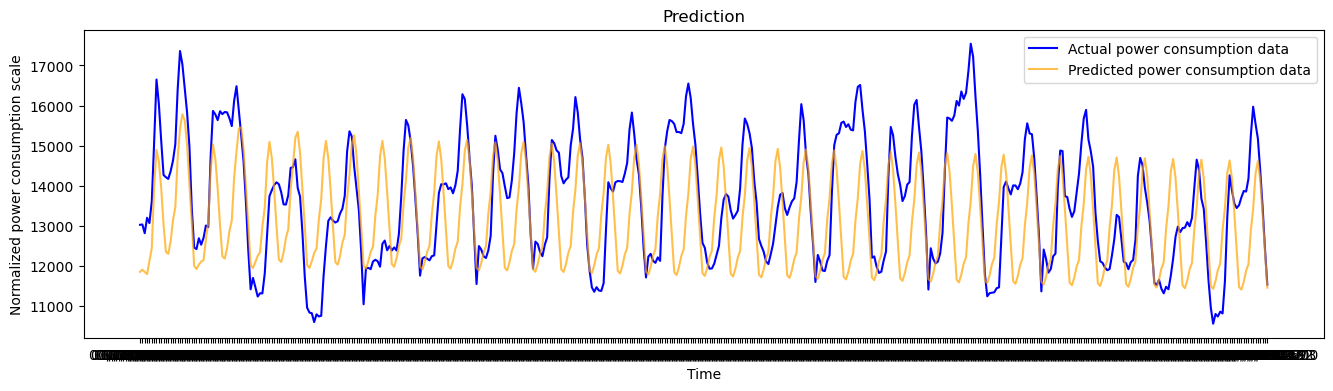

In [ ]:
plot_predictions(test,future_forecast, "Prediction")

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mae=mean_absolute_error(test,future_forecast)
mape=mean_absolute_percentage_error(test,future_forecast)
rmse=np.sqrt(mean_squared_error(test,future_forecast))
print(f'mae:{mae}')
print(f'mape:{mape}')
print(f'rmse:{rmse}')

mae:1160.880577488136
mape:0.08323706887588085
rmse:1478.061307762618


In [ ]:
import matplotlib.pyplot as plt
def plot_predictions_attack(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual predicted data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Prediction after the attack')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

In [ ]:
#SCALE ATTACK
import datetime
import numpy as np
future_forecast_new=future_forecast.copy()
attack_data=future_forecast_new.loc['01/22/2023 01':'01/23/2023 00']
ts=4
te=8
start_time=ts
for t in range (ts,te-1):

    x = datetime.datetime(2023,1,22,1,0)
    start_datetime=x+datetime.timedelta(hours=ts) #after 5th hour
    start_datetime_string=start_datetime.strftime("%m/%d/%Y %H")
    print(start_datetime_string)
    ts=ts+1

    attack_data_new= attack_data.loc[start_datetime_string]
    print(attack_data_new)

    attack_data.loc[start_datetime_string]=(1+0.1)*attack_data_new

attack_data.head(10)
#plot_predictions(attack_data,future_forecast, "Predictions made after scale attack")




01/22/2023 05
Prediction    13185.419333
Name: 01/22/2023 05, dtype: float64
01/22/2023 06
Prediction    13736.366573
Name: 01/22/2023 06, dtype: float64
01/22/2023 07
Prediction    14608.497281
Name: 01/22/2023 07, dtype: float64


,Prediction
DATETIME,
01/22/2023 01,11723.019666
01/22/2023 02,11916.726837
01/22/2023 03,12190.500002
01/22/2023 04,12353.270838
01/22/2023 05,14503.961266
01/22/2023 06,15110.003230
01/22/2023 07,16069.347009
01/22/2023 08,14921.092928
01/22/2023 09,14456.033330


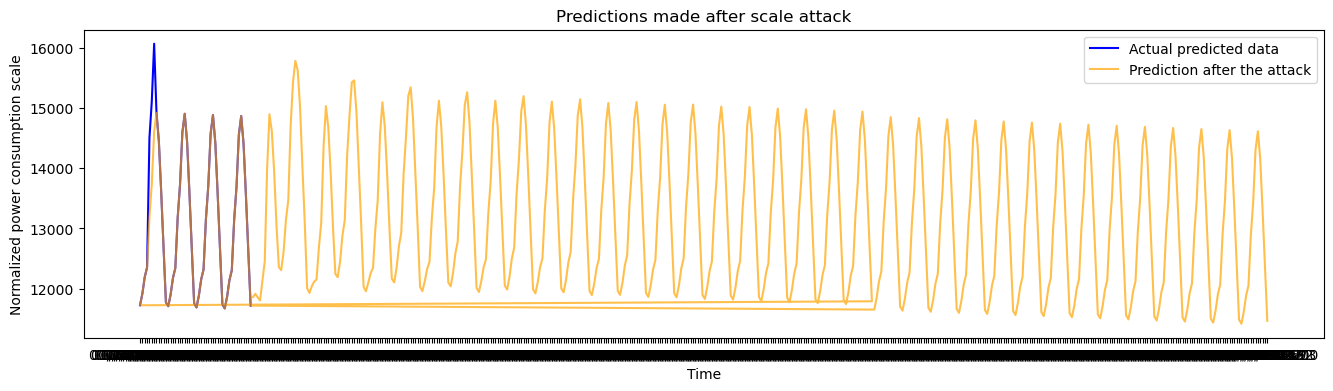

In [ ]:
plot_predictions_attack(attack_data,future_forecast, "Predictions made after scale attack")

01/22/2023 05
Prediction    13185.419333
Name: 01/22/2023 05, dtype: float64


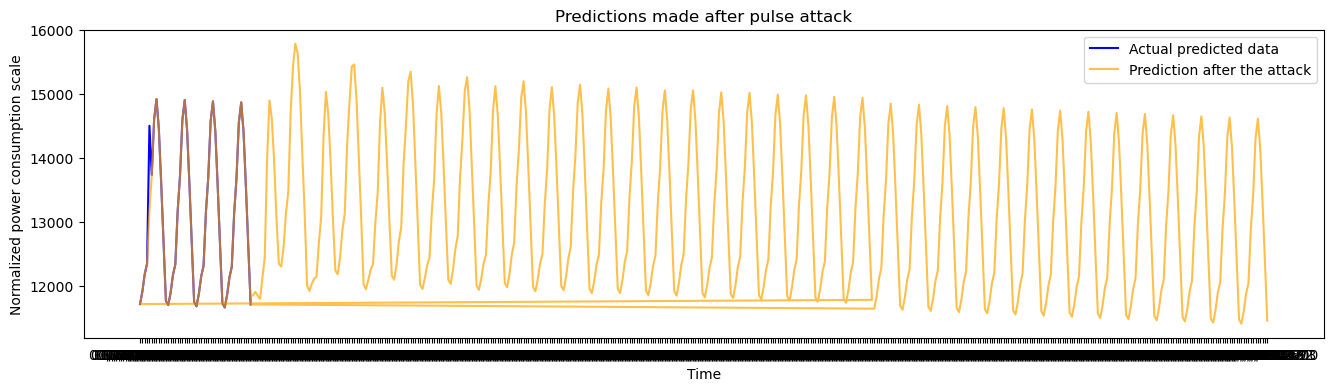

In [ ]:
#pulse ATTACK
import datetime
import numpy as np
future_forecast_NEW=future_forecast.copy()
attack_data_pulse=future_forecast_NEW.loc['01/22/2023 01':'01/23/2023 00']
attack_data_pulse.head(5)
tp=5
x = datetime.datetime(2023,1,22,1,0)
start_datetime=x+datetime.timedelta(hours=4) #after 5th hour
start_datetime_string=start_datetime.strftime("%m/%d/%Y %H")
print(start_datetime_string)
pulse_attack_data_new= attack_data_pulse.loc[start_datetime_string]
print(pulse_attack_data_new)
attack_data_pulse.loc[start_datetime_string]=(1+0.1)*pulse_attack_data_new
attack_data_pulse.head(6)
plot_predictions_attack(attack_data_pulse,future_forecast, "Predictions made after pulse attack")

In [ ]:
#ramp 1 ATTACK
import datetime
import numpy as np
future_forecast_new_ramp=future_forecast.copy()
attack_data_ramp=future_forecast_new_ramp.loc['01/22/2023 01':'01/23/2023 00']
tsr=4
ter=8
start_time_ramp=4
for t in range (tsr,ter-1,1):

    xr = datetime.datetime(2023,1,22,1,0)
    start_datetime_ramp=xr+datetime.timedelta(hours=tsr) #after 5th hour
    start_datetime_string_ramp=start_datetime_ramp.strftime("%m/%d/%Y %H")
    print(start_datetime_string_ramp)
    tsr=tsr+1
    print(tsr)

    attack_data_new_ramp= attack_data_ramp.loc[start_datetime_string_ramp]
    print(attack_data_new_ramp)

    attack_data_ramp.loc[start_datetime_string_ramp]=0.1*(tsr-start_time_ramp)*attack_data_new_ramp

attack_data_ramp.head(10)

01/22/2023 05
5
Prediction    13185.419333
Name: 01/22/2023 05, dtype: float64
01/22/2023 06
6
Prediction    13736.366573
Name: 01/22/2023 06, dtype: float64
01/22/2023 07
7
Prediction    14608.497281
Name: 01/22/2023 07, dtype: float64


,Prediction
DATETIME,
01/22/2023 01,11723.019666
01/22/2023 02,11916.726837
01/22/2023 03,12190.500002
01/22/2023 04,12353.270838
01/22/2023 05,1318.541933
01/22/2023 06,2747.273315
01/22/2023 07,4382.549184
01/22/2023 08,14921.092928
01/22/2023 09,14456.033330


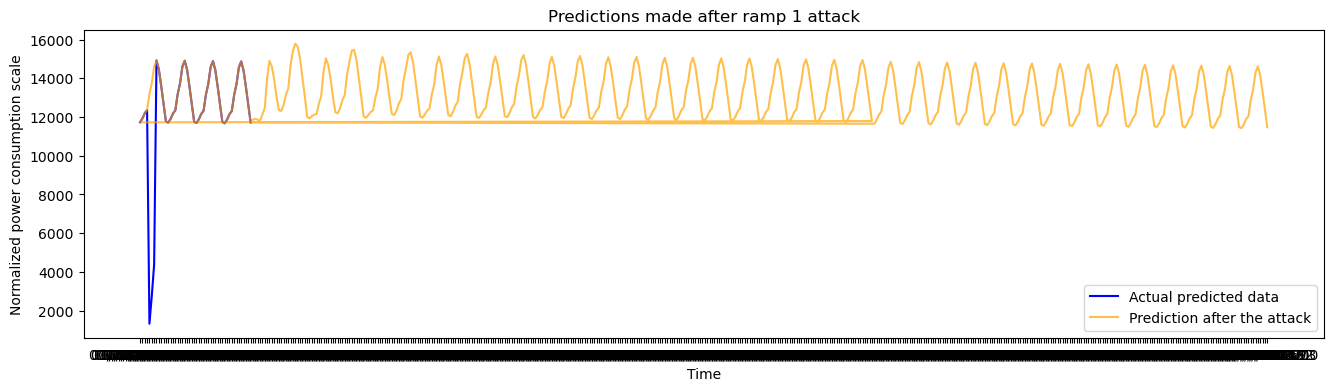

In [ ]:
plot_predictions_attack(attack_data_ramp,future_forecast, "Predictions made after ramp 1 attack")

In [ ]:
#ramp 2 ATTACK upscaling
import datetime
import numpy as np
future_forecast_new_ramp_2=future_forecast.copy()
attack_data_ramp_2=future_forecast_new_ramp_2.loc['01/22/2023 01':'01/23/2023 00']
tsr2=4
ter2=8
tre2_actu= (tsr2+ter2)/2
tre2_act=int(tre2_actu)
start_time_ramp_2=4
for t in range (tsr2,tre2_act-1,1):

    xr2 = datetime.datetime(2023,1,22,1,0)
    start_datetime_ramp=xr2+datetime.timedelta(hours=tsr2) #after 5th hour
    start_datetime_string_ramp=start_datetime_ramp.strftime("%m/%d/%Y %H")
    print(start_datetime_string_ramp)
    tsr2=tsr2+1
    print(tsr2)

    attack_data_new_ramp= attack_data_ramp_2.loc[start_datetime_string_ramp]
    print(attack_data_new_ramp)

    attack_data_ramp_2.loc[start_datetime_string_ramp]=(1+0.1*(tsr2-start_time_ramp_2))*attack_data_new_ramp

attack_data_ramp_2.head(10)

01/22/2023 05
5
Prediction    13185.419333
Name: 01/22/2023 05, dtype: float64


,Prediction
DATETIME,
01/22/2023 01,11723.019666
01/22/2023 02,11916.726837
01/22/2023 03,12190.500002
01/22/2023 04,12353.270838
01/22/2023 05,14503.961266
01/22/2023 06,13736.366573
01/22/2023 07,14608.497281
01/22/2023 08,14921.092928
01/22/2023 09,14456.033330


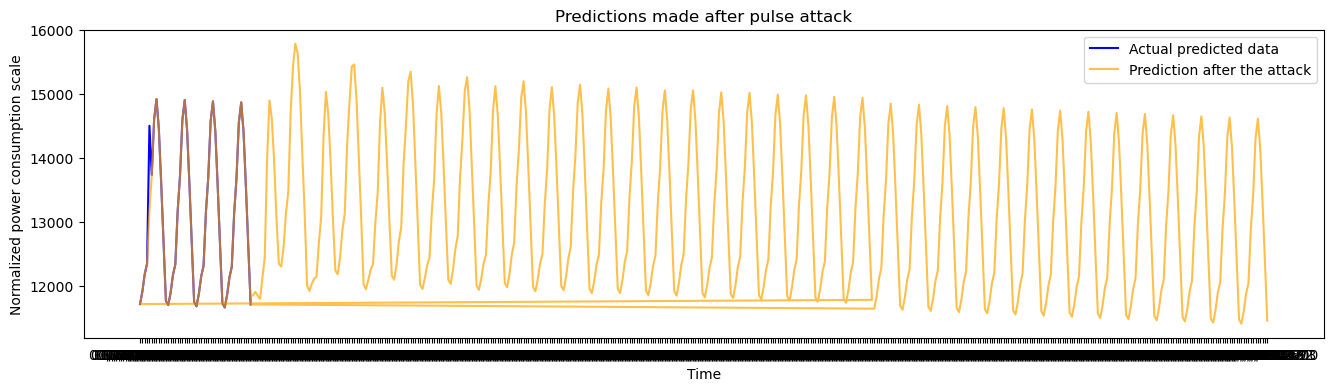

In [ ]:
plot_predictions_attack(attack_data_ramp_2,future_forecast, "Predictions made after pulse attack")

In [ ]:
#ramp 2 ATTACK downscaling
import datetime
import numpy as np
future_forecast_new_ramp_down=future_forecast.copy()
attack_data_ramp_3=future_forecast_new_ramp_down.loc['01/22/2023 01':'01/23/2023 00']
tsr3=4
ter3=8
tre3_actu= (tsr3+ter3)/2
tre3_act=int(tre3_actu)
start_time_ramp_3=ter3
for t in range (tre3_act,ter3-1,1):

    xr3 = datetime.datetime(2023,1,22,1,0)
    start_datetime_ramp_down=xr3 +datetime.timedelta(hours=tre3_act) #after 5th hour
    start_datetime_string_ramp_down=start_datetime_ramp_down.strftime("%m/%d/%Y %H")
    print(start_datetime_string_ramp_down)
    tre3_act=tre3_act+1
    print(tre3_act)

    attack_data_new_ramp_3= attack_data_ramp_3.loc[start_datetime_string_ramp_down]
    print(attack_data_new_ramp_3)

    attack_data_ramp_3.loc[start_datetime_string_ramp_down]=(1+0.1*(start_time_ramp_3-tre3_act))*attack_data_new_ramp_3

attack_data_ramp_3.head(10)
future_forecast.head()

01/22/2023 07
7
Prediction    14608.497281
Name: 01/22/2023 07, dtype: float64


,Prediction
DATETIME,
01/11/2023 01,11857.887151
01/11/2023 02,11913.207529
01/11/2023 03,11855.013663
01/11/2023 04,11802.628642
01/11/2023 05,12122.090079


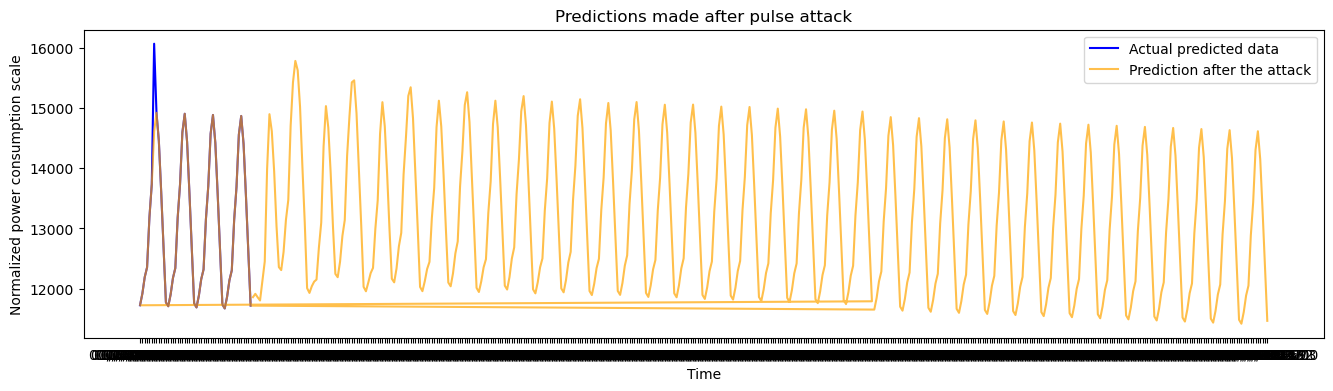

In [ ]:
plot_predictions_attack(attack_data_ramp_3,future_forecast, "Predictions made after pulse attack")


In [ ]:
#random ATTACK downscaling
import datetime
import numpy as np
import random
future_forecast_random=future_forecast.copy()
attack_data_random=future_forecast_random.loc['01/22/2023 01':'01/23/2023 00']
tsra=4
tera=8
start_time_random=4
lamda=(future_forecast['Prediction'].max())/2
print(lamda)
for t in range (tsra,tera-1,1):
    xra = datetime.datetime(2023,1,22,1,0)
    start_datetime_random=xra+datetime.timedelta(hours=tsra) #after 5th hour
    start_datetime_string_random=start_datetime_random.strftime("%m/%d/%Y %H")
    print(start_datetime_string_random)
    tsra=tsra+1
    print(tsra)
    attack_data_random_specific= attack_data_random.loc[start_datetime_string_random]
    print(attack_data_random_specific)
    print("random uniform value generated",random.uniform(tsra+1,tera-1))
    attack_data_random.loc[start_datetime_string_random]=attack_data_random_specific+lamda*random.uniform(tsra+1,tera-1)

attack_data_random.head(10)

7891.947074316171
01/22/2023 05
5
Prediction    13185.419333
Name: 01/22/2023 05, dtype: float64
random uniform value generated 6.29991329833868
01/22/2023 06
6
Prediction    13736.366573
Name: 01/22/2023 06, dtype: float64
random uniform value generated 7.0
01/22/2023 07
7
Prediction    14608.497281
Name: 01/22/2023 07, dtype: float64
random uniform value generated 7.4735910326791615


,Prediction
DATETIME,
01/22/2023 01,11723.019666
01/22/2023 02,11916.726837
01/22/2023 03,12190.500002
01/22/2023 04,12353.270838
01/22/2023 05,66218.780523
01/22/2023 06,68979.996093
01/22/2023 07,77038.421883
01/22/2023 08,14921.092928
01/22/2023 09,14456.033330


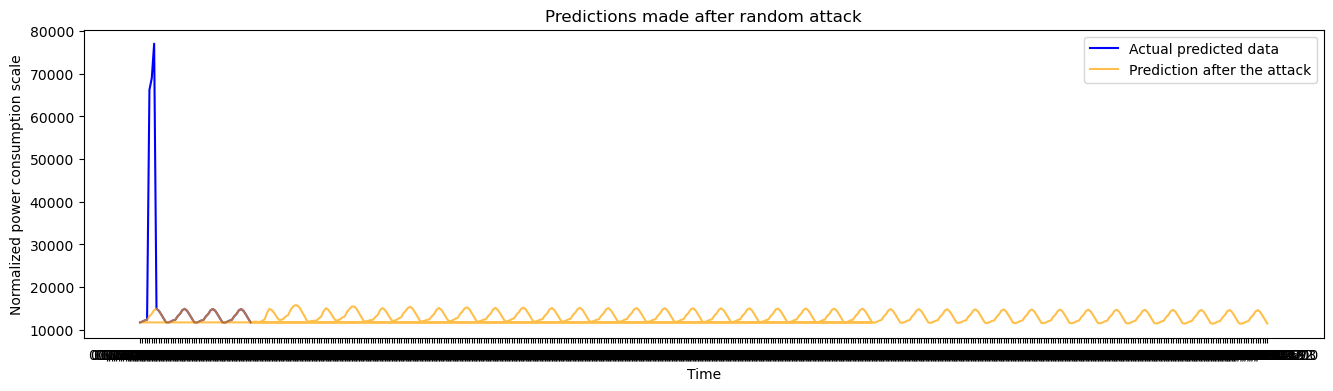

In [ ]:
plot_predictions_attack(attack_data_random,future_forecast, "Predictions made after random attack")

In [ ]:
#anamoly detect of random attack
detection=pd.concat([test,attack_data_random,future_forecast_level], axis=1, join='inner')
detection.head()

,MWh,Prediction,lowerpre,higherpre
DATETIME,,,,
01/22/2023 01,12506,11723.019666,-82035.569915,105481.609248
01/22/2023 02,12362,11916.726837,-82361.240256,106194.693929
01/22/2023 03,12119,12190.500002,-82605.666973,106986.666978
01/22/2023 04,12054,12353.270838,-82958.646034,107665.187709
01/22/2023 05,12297,66218.780523,-82639.552458,109010.391123


In [ ]:
detection['error']=detection['MWh']-detection['Prediction']
detection.head()

,MWh,Prediction,lowerpre,higherpre,error
DATETIME,,,,,
01/22/2023 01,12506,11723.019666,-82035.569915,105481.609248,782.980334
01/22/2023 02,12362,11916.726837,-82361.240256,106194.693929,445.273163
01/22/2023 03,12119,12190.500002,-82605.666973,106986.666978,-71.500002
01/22/2023 04,12054,12353.270838,-82958.646034,107665.187709,-299.270838
01/22/2023 05,12297,66218.780523,-82639.552458,109010.391123,-53921.780523


In [ ]:
detection['uncertainity']=detection['higherpre']-detection['lowerpre']

In [ ]:
detection['anamoly']=detection.apply(lambda x:'1'if (np.abs(x['error'])>1.5*x['uncertainity'])else '-1',axis=1)

In [ ]:
detection.head(10)

,MWh,Prediction,lowerpre,higherpre,error,uncertainity,anamoly
DATETIME,,,,,,,
01/22/2023 01,12506,11723.019666,-82035.569915,105481.609248,782.980334,187517.179162,-1
01/22/2023 02,12362,11916.726837,-82361.240256,106194.693929,445.273163,188555.934185,-1
01/22/2023 03,12119,12190.500002,-82605.666973,106986.666978,-71.500002,189592.333951,-1
01/22/2023 04,12054,12353.270838,-82958.646034,107665.187709,-299.270838,190623.833743,-1
01/22/2023 05,12297,66218.780523,-82639.552458,109010.391123,-53921.780523,191649.943581,-1
01/22/2023 06,12559,68979.996093,-82598.945582,110071.678728,-56420.996093,192670.624311,-1
01/22/2023 07,13018,77038.421883,-82234.469815,111451.464377,-64020.421883,193685.934192,-1
01/22/2023 08,13473,14921.092928,-82426.882663,112269.068519,-1448.092928,194695.951182,-1
01/22/2023 09,13780,14456.033330,-83394.344618,112306.411277,-676.033330,195700.755895,-1


In [ ]:
#anamoly detection using unattacked data
detection=pd.concat([test,future_forecast,future_forecast_level], axis=1, join='inner')
detection.head()
detection['error']=detection['MWh']-detection['Prediction']
print(abs(detection['error']))
detection.head()
detection['uncertainity']=detection['higherpre']-detection['lowerpre']
print(detection['uncertainity'])
detection['anamoly']=detection.apply(lambda x:'1'if (np.abs(x['error'])>1.5*x['uncertainity'])else '-1',axis=1)
detection.head()


DATETIME
01/11/2023 01    1173.112849
01/11/2023 02    1125.792471
01/11/2023 03     965.986337
01/11/2023 04    1403.371358
01/11/2023 05     950.909921
                    ...     
01/30/2023 20     563.953727
01/30/2023 21     231.641127
01/30/2023 22     185.416025
01/30/2023 23      73.336267
01/30/2023 00      75.588306
Name: error, Length: 480, dtype: float64
DATETIME
01/11/2023 01      1468.275537
01/11/2023 02      2317.554729
01/11/2023 03      2974.754826
01/11/2023 04      3519.492193
01/11/2023 05      3992.208358
                     ...      
01/30/2023 20    436268.747915
01/30/2023 21    437591.950273
01/30/2023 22    438911.163604
01/30/2023 23    440226.423720
01/30/2023 00    441537.765937
Name: uncertainity, Length: 480, dtype: float64


,MWh,Prediction,lowerpre,higherpre,error,uncertainity,anamoly
DATETIME,,,,,,,
01/11/2023 01,13031,11857.887151,11123.749382,12592.024920,1173.112849,1468.275537,-1
01/11/2023 02,13039,11913.207529,10754.430164,13071.984894,1125.792471,2317.554729,-1
01/11/2023 03,12821,11855.013663,10367.636250,13342.391076,965.986337,2974.754826,-1
01/11/2023 04,13206,11802.628642,10042.882545,13562.374738,1403.371358,3519.492193,-1
01/11/2023 05,13073,12122.090079,10125.985901,14118.194258,950.909921,3992.208358,-1
